In [1]:
import pandas as pd
import seaborn as sb
from sklearn.preprocessing import StandardScaler

## data pre-processing

In [2]:
df = pd.read_csv('/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/final_cleaned_dataset/cleaned_annex.csv')
df.sample(5)

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),CustomerId,Item Name,Category Name,Loss Rate
668668,2022-09-22,20:11:41,102900011035511,0.529,7.6,sale,No,712874.0,Net Lotus Root (3),Aquatic Tuberous Vegetables,9.43
437703,2021-10-09,18:24:30,102900011008164,0.445,7.0,sale,No,550978.0,Naibaicai,Flower,15.68
206653,2021-01-24,11:40:09,102900005115250,0.165,21.8,sale,No,528447.0,Xixia Black Mushroom (1),Edible Mushroom,10.80
505931,2022-01-29,17:25:59,102900005116530,0.379,19.8,sale,No,316894.0,Xixia Mushroom (1),Edible Mushroom,13.82
456292,2021-11-07,16:29:02,102900005116233,0.401,16.0,sale,No,410240.0,Red Pepper (1),Capsicum,11.76


In [3]:
df['Sale or Return'].value_counts()

Sale or Return
sale      878040
return       461
Name: count, dtype: int64

In [4]:
df = df.drop(['Date', 'Time', 'Item Code', 'CustomerId', 'Loss Rate'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878501 entries, 0 to 878500
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Quantity Sold (kilo)         878501 non-null  float64
 1   Unit Selling Price (RMB/kg)  878501 non-null  float64
 2   Discount (Yes/No)            878501 non-null  object 
 3   Item Name                    878501 non-null  object 
 4   Category Name                878501 non-null  object 
dtypes: float64(2), object(3)
memory usage: 33.5+ MB


In [6]:
df.isnull().sum()

Quantity Sold (kilo)           0
Unit Selling Price (RMB/kg)    0
Discount (Yes/No)              0
Item Name                      0
Category Name                  0
dtype: int64

In [7]:
for i in range(df.shape[0]):
    if df['Discount (Yes/No)'].values[i] == 'Yes':
        df['Discount (Yes/No)'].values[i] = 1
    else:
        df['Discount (Yes/No)'].values[i] = 0
        
df['Discount (Yes/No)'] = df['Discount (Yes/No)'].astype(int)
df.sample(5)  

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Discount (Yes/No),Item Name,Category Name
605201,0.263,19.8,0,Yunnan Shengcai,Flower
247452,0.485,6.0,0,Yunnan Shengcai,Flower
532938,0.452,8.0,0,Yunnan Lettuces,Flower
369417,0.688,6.0,0,Yellow Xincai (1),Flower
61546,0.311,10.0,0,Apricot Bao Mushroom (1),Edible Mushroom


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878501 entries, 0 to 878500
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Quantity Sold (kilo)         878501 non-null  float64
 1   Unit Selling Price (RMB/kg)  878501 non-null  float64
 2   Discount (Yes/No)            878501 non-null  int64  
 3   Item Name                    878501 non-null  object 
 4   Category Name                878501 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.5+ MB


In [9]:
df['Discount (Yes/No)'].value_counts()

Discount (Yes/No)
0    831135
1     47366
Name: count, dtype: int64

In [10]:
df.iloc[:,[0, 1, 2]].corr()

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Discount (Yes/No)
Quantity Sold (kilo),1.000000,-0.413164,0.088619
Unit Selling Price (RMB/kg),-0.413164,1.000000,-0.072037
Discount (Yes/No),0.088619,-0.072037,1.000000


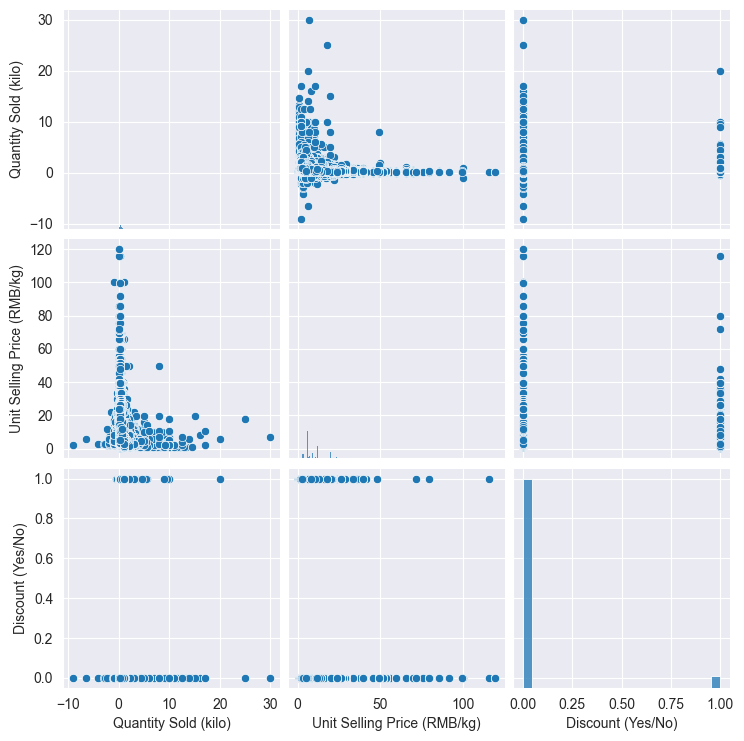

In [11]:
sb.pairplot(df.iloc[:,[0, 1, 2]])

In [12]:
df.head()

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Discount (Yes/No),Item Name,Category Name
0,0.396,7.6,0,Paopaojiao (Jingpin),Capsicum
1,0.849,3.2,0,Chinese Cabbage,Flower
2,0.409,7.6,0,Paopaojiao (Jingpin),Capsicum
3,0.421,10.0,0,Shanghaiqing,Flower
4,0.539,8.0,0,Caixin,Flower


In [13]:
df['Discount (Yes/No)'] = df['Discount (Yes/No)'].astype(str)

In [14]:
df['Quantity Sold (kilo)'].min(),df['Quantity Sold (kilo)'].max()

(-9.082, 30.0)

In [15]:
df['Unit Selling Price (RMB/kg)'].min(), df['Unit Selling Price (RMB/kg)'].max()

(0.1, 119.9)

In [16]:
scaler = StandardScaler()
df['Quantity Sold (kilo)'] = scaler.fit_transform(df['Quantity Sold (kilo)'].values.reshape(-1, 1))
df['Unit Selling Price (RMB/kg)'] = scaler.fit_transform(df['Unit Selling Price (RMB/kg)'].values.reshape(-1, 1))
df.head()

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Discount (Yes/No),Item Name,Category Name
0,-0.386429,-0.208697,0,Paopaojiao (Jingpin),Capsicum
1,0.864569,-0.905863,0,Chinese Cabbage,Flower
2,-0.350528,-0.208697,0,Paopaojiao (Jingpin),Capsicum
3,-0.317389,0.171575,0,Shanghaiqing,Flower
4,0.008478,-0.145318,0,Caixin,Flower


In [17]:
df = pd.get_dummies(df)
df.shape

(878501, 252)

In [18]:
df.sample(5)

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Discount (Yes/No)_0,Discount (Yes/No)_1,Item Name_7 Colour Pepper (1),Item Name_7 Colour Pepper (2),Item Name_7 Colour Pepper (Bag),Item Name_Agaricus Bisporus (Bag),Item Name_Agaricus Bisporus (Box),Item Name_Aihao,...,Item Name_Zhijiang Red Bolt (Bag),Item Name_Zhimaxiancai,Item Name_Zhuyecai,Item Name_Zhuyecai (Bag),Category Name_Aquatic Tuberous Vegetables,Category Name_Cabbage,Category Name_Capsicum,Category Name_Edible Mushroom,Category Name_Flower,Category Name_Solanum
435460,-0.287012,0.171575,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3402,-1.341936,2.675034,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
824178,0.077517,-0.367144,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
593783,0.002955,-0.462212,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
687323,-0.405760,-0.145318,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [19]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [20]:
wcss_error = []
model = KMeans(n_clusters= 100000)
model.fit(df)
wcss_error.append(model.inertia_)

/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyboardInterrupt: 

In [ ]:
wcss_error